In [190]:
import pandas as pd
%matplotlib inline
%pylab inline
import pprint


# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
pylab.rcParams['figure.figsize'] = (20, 10) 

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [191]:
df = pd.read_csv('./AQdata_clean.csv')
dailyMean = pd.read_csv('./AQdata_dailyMean.csv')
dailyMax = pd.read_csv('./AQdata_dailyMax.csv')

In [192]:
df = df.rename(columns={'ewma': 'AQI'})
chem = 'PT08.S4(NO2)'

## Try set1: time data + aqi

In [193]:
df.columns

Index(['DateTime', 'idx', 'Date', 'Day', 'Hour', 'Weekday', 'Week', 'Month',
       'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH',
       'AH', 'AQI'],
      dtype='object')

In [194]:
9357 - 8769

588

In [195]:
trainset_col = ['idx', 'Day', 'Hour', 'Weekday', 'Week', 'Month']
trainset = df[:8760]
testset = df[-588:]
trainset.head()

,DateTime,idx,Date,Day,Hour,Weekday,Week,Month,PT08.S1(CO),PT08.S2(NMHC),...,PT08.S4(NO2),PT08.S5(O3),CO(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH,AQI
0,2004-03-10 18:00:00,0,2004-03-10,10,18,3,11,3,1360.0,1046.0,...,1692.0,1268.0,2.6,11.9,166.0,113.0,13.6,48.9,0.7578,1692.000000
1,2004-03-10 19:00:00,1,2004-03-10,10,19,3,11,3,1292.0,955.0,...,1559.0,972.0,2.0,9.4,103.0,92.0,13.3,47.7,0.7255,1592.250000
2,2004-03-10 20:00:00,2,2004-03-10,10,20,3,11,3,1402.0,939.0,...,1555.0,1074.0,2.2,9.0,131.0,114.0,11.9,54.0,0.7502,1566.461538
3,2004-03-10 21:00:00,3,2004-03-10,10,21,3,11,3,1376.0,948.0,...,1584.0,1203.0,2.2,9.2,172.0,122.0,11.0,60.0,0.7867,1578.300000
4,2004-03-10 22:00:00,4,2004-03-10,10,22,3,11,3,1272.0,836.0,...,1490.0,1110.0,1.6,6.5,131.0,116.0,11.2,59.6,0.7888,1519.190083


In [196]:
from sklearn.model_selection import train_test_split

def prep_data(df, indi, sizepct):
    X = df[indi].fillna(method = 'ffill')
    y = df['AQI'].fillna(method = 'ffill')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sizepct)
    return X_train, X_test, y_train, y_test

In [197]:
X_train, X_dev, y_train, y_dev = prep_data(trainset, trainset_col, 0.3 )
print("X_train's shape is: ", X_train.shape) #for train
print("y_train's shape is: ", y_train.shape) #for train
print("X_def's shape is: ", X_dev.shape) # for predict
print("y_def's shape is: ", y_dev.shape) # for score

X_train's shape is:  (6132, 6)
y_train's shape is:  (6132,)
X_def's shape is:  (2628, 6)
y_def's shape is:  (2628,)


In [198]:
X_train.head()

,idx,Day,Hour,Weekday,Week,Month
81,81,14,3,7,11,3
4467,4467,12,21,7,37,9
1892,1892,28,14,5,22,5
1912,1912,29,10,6,22,5
7730,7730,26,20,3,4,1


In [282]:
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import BayesianRidge
# from sklearn.neural_network import MLPRegressor

def run_models(X_train, X_def, y_train, y_def):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    print('Model_1: LinearRegression, score: ', lin_reg.score(X_def, y_def))
    
    knn = neighbors.KNeighborsRegressor(7)
    knn.fit(X_train, y_train.values.ravel())
    # 使用 fit 來建置模型，其參數接收 training data matrix, defing data array，所以進行 y_train.values.ravel() 轉換
    print('Model_2: KNeighborsRegressor, score:', knn.score(X_def, y_def))
    
    clf = SVR(C = 0.0001, epsilon = 0.5, kernel = 'linear')
    clf.fit(X_train,y_train)
    print('Model_3: SVR, score:', clf.score(X_def, y_def))
    
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train,y_train)
    print('Model_4: DecisionTreeRegressor, score:', regressor.score(X_def, y_def))

    regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=0)
    regr_2.fit(X_train,y_train)
    print('Model_5: AdaBoostRegressor, score:', regr_2.score(X_def, y_def))
    
    clf2 = BayesianRidge(compute_score=True)
    clf2.fit(X_train,y_train)
    print('Model_6: BayesianRidge, score:', clf2.score(X_def, y_def))
    return [lin_reg, knn, clf, regressor, regr_2, clf2]

In [283]:
run_models(X_train, X_dev, y_train, y_dev)

Model_1: LinearRegression, score:  0.423748296895
Model_2: KNeighborsRegressor, score: 0.760366097915
Model_3: SVR, score: 0.333210527258
Model_4: DecisionTreeRegressor, score: 0.878882627974
Model_5: AdaBoostRegressor, score: 0.666409410507
Model_6: BayesianRidge, score: 0.42378166432


[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform'),
 SVR(C=0.0001, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
   kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,


In [201]:
# create dummies from df
dummies_list = ['Weekday','Hour','Month']
def create_dummies(df):
    for col in dummies_list:
        df[col].fillna(method = 'ffill')
        dummydf = pd.get_dummies(df[col])
        df = pd.concat([df, dummydf], axis = 1)
    return df

In [202]:
X_train1, X_dev1, y_train1, y_dev1 = prep_data(trainset, trainset_col, 0.3 )

In [203]:
X_train1 = create_dummies(X_train1)
X_dev1 = create_dummies(X_dev1)

In [204]:
X_train1.head()

,idx,Day,Hour,Weekday,Week,Month,1,2,3,4,...,3,4,5,6,7,8,9,10,11,12
2009,2009,2,11,3,23,6,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2185,2185,9,19,3,24,6,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2856,2856,7,18,3,28,7,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5688,5688,2,18,2,45,11,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3981,3981,23,15,1,35,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [205]:
print("X_train's shape is: ", X_train1.shape) #for train
print("y_train's shape is: ", y_train1.shape) #for train
print("X_def's shape is: ", X_dev1.shape) # for predict
print("y_def's shape is: ", y_dev1.shape) # for score

X_train's shape is:  (6132, 49)
y_train's shape is:  (6132,)
X_def's shape is:  (2628, 49)
y_def's shape is:  (2628,)


In [206]:
#train with dummy 
run_models(X_train1, X_dev1, y_train1, y_dev1)

Model_1: LinearRegression, score:  0.601813110178
Model_2: KNeighborsRegressor, score: 0.751283957568
Model_3: SVR, score: 0.332436163561
Model_4: DecisionTreeRegressor, score: 0.849878181814
Model_5: AdaBoostRegressor, score: 0.673900479408
Model_6: BayesianRidge, score: 0.601464068035


In [207]:
X_train2, X_dev2, y_train2, y_dev2 = prep_data(trainset, trainset_col, 0.3 )
dummies_list = ['Weekday']
X_train2 = create_dummies(X_train2)
X_dev2 = create_dummies(X_dev2)
print("X_train's shape is: ", X_train2.shape) #for train
print("y_train's shape is: ", y_train2.shape) #for train
print("X_def's shape is: ", X_dev2.shape) # for predict
print("y_def's shape is: ", y_dev2.shape) # for score
run_models(X_train2, X_dev2, y_train2, y_dev2)

X_train's shape is:  (6132, 13)
y_train's shape is:  (6132,)
X_def's shape is:  (2628, 13)
y_def's shape is:  (2628,)
Model_1: LinearRegression, score:  0.447325961818
Model_2: KNeighborsRegressor, score: 0.768222006858
Model_3: SVR, score: 0.322189085167
Model_4: DecisionTreeRegressor, score: 0.877910253327
Model_5: AdaBoostRegressor, score: 0.596202964082
Model_6: BayesianRidge, score: 0.447176223271


In [280]:
regressor_B = DecisionTreeRegressor(random_state=2, max_depth=200 )
regressor_B.fit(X_train2,y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=200, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2, splitter='best')

In [281]:
regressor_B.score(X_dev2, y_dev2)

0.87658196726682469

In [268]:
testseeeet = create_dummies(testset[trainset_col])

In [269]:
type(X_train2)

pandas.core.frame.DataFrame

In [270]:
type(testseeeet[:20])

pandas.core.frame.DataFrame

In [272]:
# testseeeet[:20]

In [252]:
# X_train2

In [215]:
regressor_B.predict([[9337,    3,   19,    7,   13,    4,    0,    0,    0,    0,    0, 0,    1]])

array([ 1054.10073613])

In [216]:
np.array(testset['AQI'][:20]) - regressor_B.predict(testseeeet[:20])

array([-225.00173521, -202.28709345, -222.7155462 , -204.19169711,
       -165.35041408,  -61.71350571,  215.4910813 ,  186.55927696,
        186.55927696,  -28.98292489,   42.35201088,  134.45370267,
        278.7850145 ,  224.71283457,  179.46240616,  256.44377765,
        490.10451085,  553.96984266,  381.92084769,   24.43531495])

In [233]:
dev2_lis = list(X_dev2.idx.values)

In [239]:
regressor_B.predict(dev2)

array([ 2045.99072403,  2096.18997904,  1441.25738502, ...,  1277.68094688,
        1399.98404915,  1804.09578175])

In [240]:
df3 = trainset.loc[trainset['idx'].isin(dev2_lis)]

In [245]:
df3['predictAQI'] = regressor_B.predict(X_dev2)
df3['predictAQI'] = regressor_B.predict(X_dev2)

/Users/ah-bau/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


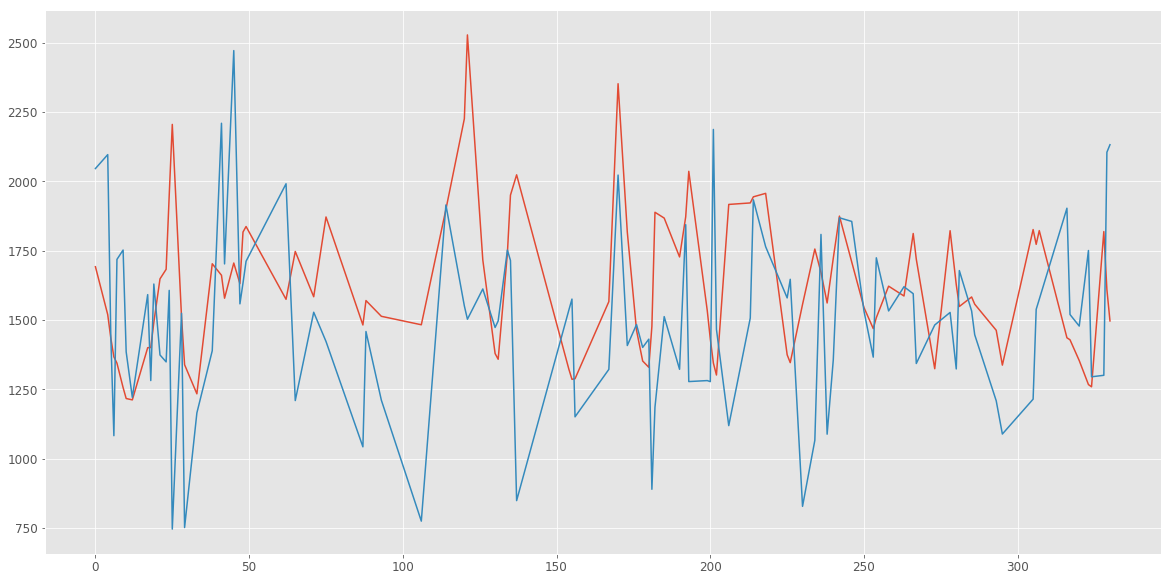

In [250]:
df3[:100].AQI.plot()
df3[:100].predictAQI.plot()

In [263]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import expon, reciprocal

# # see https://docs.scipy.org/doc/scipy-0.19.0/reference/stats.html
# # for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# # Note: gamma is ignored when kernel is "linear"
# param_distribs = {
#         'max_depth': [2,3,4,5,6]
# #         'kernel': ['linear', 'rbf'],
# #         'C': reciprocal(20, 200000),
# #         'gamma': expon(scale=1.0),
#     }
# regressor_C = DecisionTreeRegressor(random_state=0)

# rnd_search = RandomizedSearchCV(regressor_C, param_distributions=param_distribs,
#                                 n_iter=5, cv=5, scoring='neg_mean_squared_error',
#                                 verbose=2, n_jobs=4, random_state=42)
# rnd_search.fit(X_train1, y_train1)


from sklearn.model_selection import GridSearchCV

param_grid = [
        {'max_depth': [2,3,4,5,6,10,20], 'random_state' : [0,1,2,3,4,5]}
]

regressor_D = DecisionTreeRegressor()
grid_search = GridSearchCV(regressor_D, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(X_train1, y_train1)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] max_depth=2, random_state=0 .....................................
[CV] max_depth=2, random_state=0 .....................................
[CV] max_depth=2, random_state=0 .....................................
[CV] ...................... max_depth=2, random_state=0, total=   0.0s
[CV] ...................... max_depth=2, random_state=0, total=   0.0s
[CV] max_depth=2, random_state=0 .....................................
[CV] max_depth=2, random_state=1 .....................................
[CV] max_depth=2, random_state=0 .....................................
[CV] ...................... max_depth=2, random_state=0, total=   0.0s
[CV] ...................... max_depth=2, random_state=0, total=   0.0s
[CV] ...................... max_depth=2, random_state=0, total=   0.0s
[CV] max_depth=2, random_state=1 .....................................
[CV] ...................... max_depth=2, random_state=1, total=   0.0s
[CV] max_depth=

[CV] max_depth=4, random_state=0 .....................................
[CV] ...................... max_depth=4, random_state=0, total=   0.0s
[CV] max_depth=4, random_state=0 .....................................
[CV] ...................... max_depth=3, random_state=5, total=   0.0s
[CV] max_depth=3, random_state=5 .....................................
[CV] ...................... max_depth=3, random_state=5, total=   0.0s
[CV] ...................... max_depth=4, random_state=0, total=   0.0s
[CV] max_depth=4, random_state=1 .....................................
[CV] max_depth=4, random_state=1 .....................................
[CV] ...................... max_depth=3, random_state=5, total=   0.0s
[CV] ...................... max_depth=4, random_state=0, total=   0.0s
[CV] max_depth=3, random_state=5 .....................................
[CV] max_depth=4, random_state=0 .....................................
[CV] ...................... max_depth=4, random_state=1, total=   0.0s
[CV] .

[CV] ...................... max_depth=5, random_state=4, total=   0.0s
[CV] max_depth=5, random_state=5 .....................................
[CV] ...................... max_depth=5, random_state=5, total=   0.0s
[CV] max_depth=6, random_state=0 .....................................
[CV] max_depth=5, random_state=5 .....................................
[CV] ...................... max_depth=5, random_state=4, total=   0.0s
[CV] ...................... max_depth=6, random_state=0, total=   0.0s
[CV] ...................... max_depth=5, random_state=5, total=   0.0s
[CV] max_depth=6, random_state=0 .....................................
[CV] ...................... max_depth=5, random_state=5, total=   0.0s
[CV] max_depth=5, random_state=5 .....................................
[CV] max_depth=6, random_state=0 .....................................
[CV] max_depth=6, random_state=1 .....................................
[CV] ...................... max_depth=6, random_state=1, total=   0.0s
[CV] .

[Parallel(n_jobs=4)]: Done 108 tasks      | elapsed:    1.3s


[CV] ...................... max_depth=6, random_state=1, total=   0.0s
[CV] ...................... max_depth=6, random_state=0, total=   0.0s
[CV] max_depth=6, random_state=1 .....................................
[CV] ...................... max_depth=6, random_state=1, total=   0.1s
[CV] ...................... max_depth=6, random_state=2, total=   0.0s
[CV] max_depth=6, random_state=2 .....................................
[CV] max_depth=6, random_state=2 .....................................
[CV] max_depth=6, random_state=0 .....................................
[CV] ...................... max_depth=6, random_state=0, total=   0.0s
[CV] ...................... max_depth=6, random_state=1, total=   0.0s
[CV] max_depth=6, random_state=1 .....................................
[CV] ...................... max_depth=6, random_state=2, total=   0.0s
[CV] max_depth=6, random_state=3 .....................................
[CV] max_depth=6, random_state=2 .....................................
[CV] .

[CV] max_depth=20, random_state=0 ....................................
[CV] max_depth=20, random_state=2 ....................................
[CV] ..................... max_depth=20, random_state=1, total=   0.1s
[CV] ..................... max_depth=20, random_state=0, total=   0.1s
[CV] ..................... max_depth=20, random_state=1, total=   0.1s
[CV] max_depth=20, random_state=1 ....................................
[CV] max_depth=20, random_state=0 ....................................
[CV] ..................... max_depth=20, random_state=2, total=   0.1s
[CV] max_depth=20, random_state=1 ....................................
[CV] max_depth=20, random_state=2 ....................................
[CV] ..................... max_depth=20, random_state=1, total=   0.1s
[CV] max_depth=20, random_state=2 ....................................
[CV] ..................... max_depth=20, random_state=1, total=   0.1s
[CV] max_depth=20, random_state=1 ....................................
[CV] .

[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'max_depth': [2, 3, 4, 5, 6, 10, 20], 'random_state': [0, 1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [264]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

145.8256892231675

In [265]:
grid_search.best_params_

{'max_depth': 20, 'random_state': 3}

In [90]:
#train the test with original train
run_models(X_train, X_def, y_train, y_def)

Model_1: LinearRegression, score:  0.896570751536
Model_2: KNeighborsRegressor, score: 0.924251795781
Model_3: SVR, score: 0.878732064379
Model_4: DecisionTreeRegressor, score: 0.89476508161
Model_5: AdaBoostRegressor, score: 0.897181342619
Model_6: BayesianRidge, score: 0.896271922248


In [91]:
# X_train2, X_test2, y_train2, y_test2 = prep_data(test_set, indicators, 0.3)
#train with 12 month, test with 1 month
run_models(X_train, X_test2, y_train, y_test2)

Model_1: LinearRegression, score:  0.829351503479
Model_2: KNeighborsRegressor, score: 0.80879602987
Model_3: SVR, score: 0.832658368798
Model_4: DecisionTreeRegressor, score: 0.717571383669
Model_5: AdaBoostRegressor, score: 0.762846475042
Model_6: BayesianRidge, score: 0.829546545099


In [92]:
X_train3, X_test3, y_train3, y_test3 = prep_data(train_set, related_indi, 0.1)
run_models(X_train3, X_test3, y_train3, y_test3)

Model_1: LinearRegression, score:  0.862526460113
Model_2: KNeighborsRegressor, score: 0.868929993036
Model_3: SVR, score: 0.855712173111
Model_4: DecisionTreeRegressor, score: 0.787962353725
Model_5: AdaBoostRegressor, score: 0.839840706489
Model_6: BayesianRidge, score: 0.862512961954


In [93]:
run_models(X_train, new_X, y_train, new_y)

Model_1: LinearRegression, score:  0.846465342509
Model_2: KNeighborsRegressor, score: 0.81397985629
Model_3: SVR, score: 0.84508410766
Model_4: DecisionTreeRegressor, score: 0.729386787613
Model_5: AdaBoostRegressor, score: 0.78639214258
Model_6: BayesianRidge, score: 0.846052200008


In [67]:
test_set = test_set.rename(columns={'PT08.S5(O3)': 'AQI'})
new_X = test_set[indicators].fillna(method ='ffill')
new_y = test_set['AQI'].fillna(method ='ffill')

In [29]:
clf2.score(X_test, y_test)
clf2.get_params()

{'cv': None,
 'error_score': 'raise',
 'estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'auto',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'fit_params': None,
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'C': [0.0001, 0.01], 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}

0.88664946848412363: SVR(C = 0.01, epsilon = 0.5, kernel = 'linear')

Optimization Finished!
Training cost= 9.8539e+08 W= 43.1356 b= 17.4035 



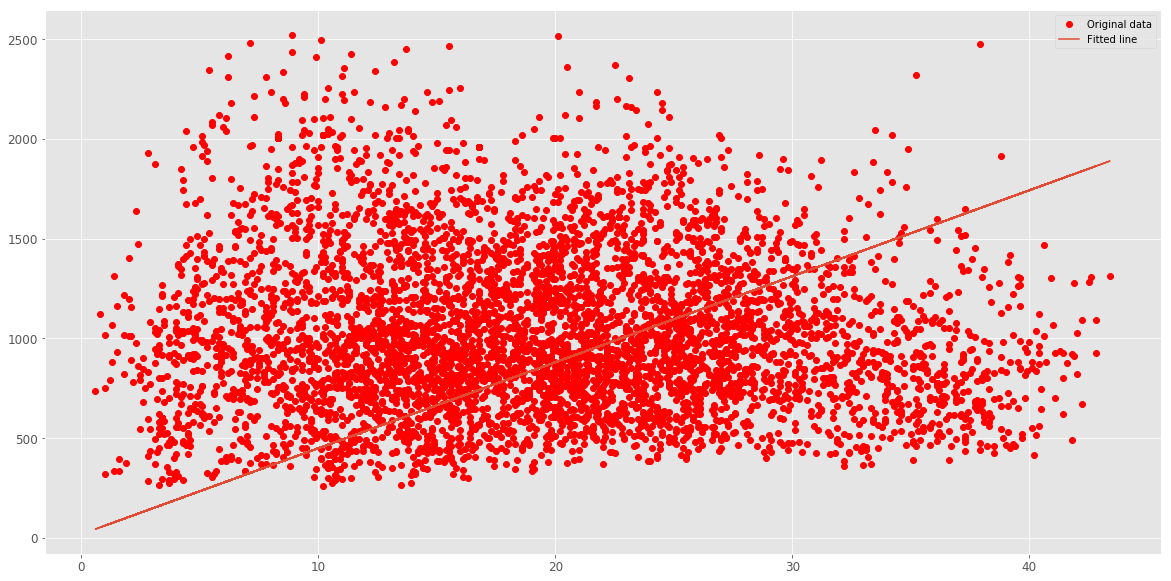

Testing... (Mean square loss Comparison)
Testing cost= 4.17419e+08
Absolute mean square loss difference: 5.67972e+08


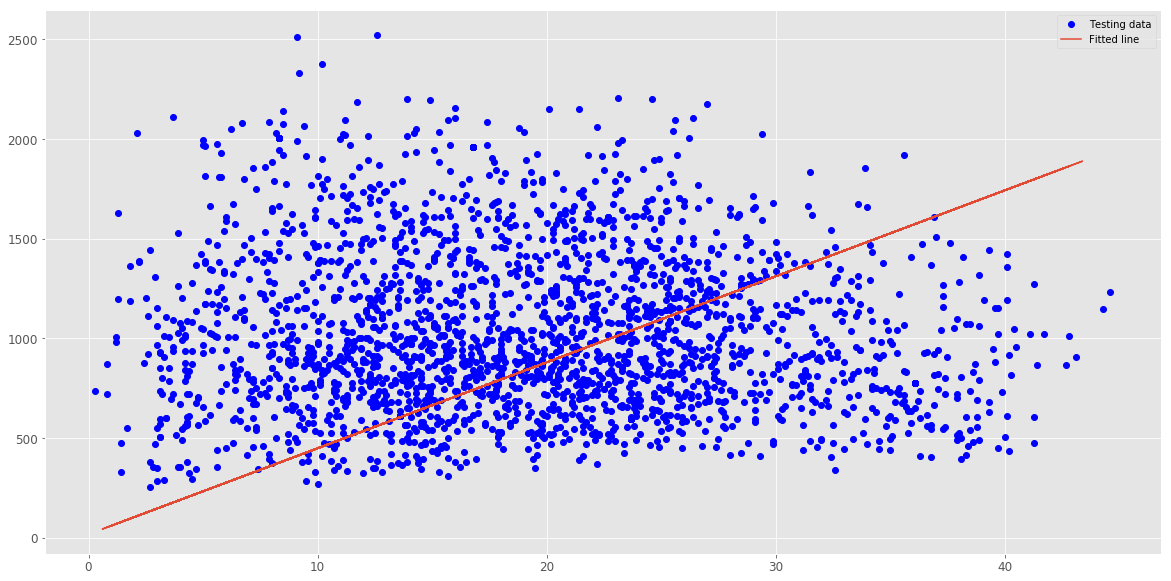

In [26]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 10
display_step = 50

# Training Data
train_X = np.array(X_train)
train_Y = np.array(y_train)
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = X_test
    test_Y = y_test

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()